In [137]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys

project_basedir = '..'
sys.path.append(project_basedir)
from cchess_zero import cbf
from cchess_zero import board_visualizer
from matplotlib import pyplot as plt
import os
from cchess_zero.gameboard import *
from net import resnet
import common
from gameplays import gameplay,players
from gameplays.analysis import get_km_json
import json
%matplotlib inline
gpu_core = 6
import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_core)

In [138]:
!date

2018年 09月 19日 星期三 12:08:39 CST


In [139]:
! ls -l '../data/distributed/' | tail

-rw-rw-r-- 1 meta meta  3141  9月 19 12:06 2018-09-19_12-35-37_276_mcts-mcts_net-net_w.cbf
-rw-rw-r-- 1 meta meta  2091  9月 19 12:08 2018-09-19_12-35-38_133_mcts-mcts_net-net_w.cbf
-rw-rw-r-- 1 meta meta  3116  9月 19 12:08 2018-09-19_12-35-38_412_mcts-mcts_net-net_b.cbf
-rw-rw-r-- 1 meta meta  2316  9月 19 12:08 2018-09-19_12-35-39_466_mcts-mcts_net-net_b.cbf
-rw-rw-r-- 1 meta meta  2591  9月 19 12:08 2018-09-19_12-35-39_498_mcts-mcts_net-net_w.cbf
-rw-rw-r-- 1 meta meta  1966  9月 19 12:08 2018-09-19_12-35-40_271_mcts-mcts_net-net_b.cbf
-rw-rw-r-- 1 meta meta  1441  9月 19 12:08 2018-09-19_12-35-40_506_mcts-mcts_net-net_w.cbf
-rw-rw-r-- 1 meta meta  1591  9月 19 12:08 2018-09-19_12-35-41_174_mcts-mcts_net-net_w.cbf
-rw-rw-r-- 1 meta meta  1191  9月 19 12:08 2018-09-19_12-35-42_120_mcts-mcts_net-net_w.cbf
-rw-rw-r-- 1 meta meta  1491  9月 19 12:07 2018-09-19_12-35-54_382_mcts-mcts_net-net_w.cbf


In [152]:

fullpath = '../data/distributed/2018-09-19_12-35-38_412_mcts-mcts_net-net_b.cbf'
moves = cbf.cbf2move(fullpath)
fname = fullpath.split('/')[-1]
print(fname)
state = gameplay.GameState()

2018-09-19_12-35-38_412_mcts-mcts_net-net_b.cbf


In [153]:
from PIL import Image
import imageio
imgs_for_gif = []
state = gameplay.GameState()
statestr = 'RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr'
for i in moves[:]: 
    statestr = GameBoard.sim_do_action(i,statestr)
    imgs_for_gif.append(board_visualizer.get_board_img(statestr))
    state.do_move(i)
imgs_for_gif = imgs_for_gif[:]
imageio.mimsave('../data/gif/{}.gif'.format(fname[:-4]), imgs_for_gif,duration=0.5)

In [154]:
i,len(moves)

('e7e8', 89)

In [155]:
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

In [156]:
display_gif('../data/gif/{}.gif'.format(fname[:-4]))

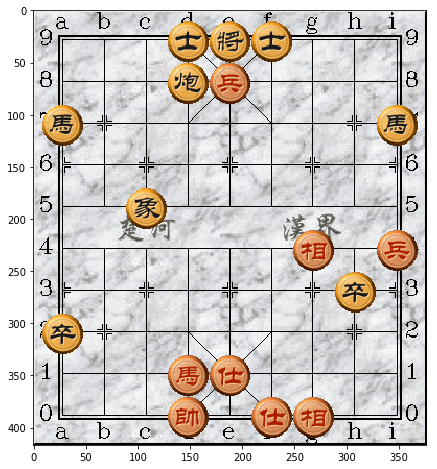

In [157]:
plt.figure(figsize=(8,8))
plt.imshow(board_visualizer.get_board_img(statestr))

# ANALYSIS

In [124]:
network = resnet.get_model(os.path.join(project_basedir,
    '../data/prepare_weight/2018-09-18_12-17-55'[3:]),
    common.board.create_uci_labels(),GPU_CORE=[gpu_core],FILTERS=128,NUM_RES_LAYERS=7)

0
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
[None, 10, 9, 128]
inside res net [None, 10, 9, 128]
INFO:tensorflow:Restoring parameters from ../data/prepare_weight/2018-09-18_12-17-55


In [133]:
network_player = players.NetworkPlayer(state.currentplayer,network,n_playout=1)

In [134]:
network_player.make_move(state=state,actual_move=False)

('c6i6', 0.09367311745882034)

In [135]:
network_player.mcts_policy._root._Q

-0.09367311745882034

In [136]:
childs = network_player.mcts_policy._root._children
probs = []
for move in childs:
    val = childs[move]
    print(move,val._n_visits,val._P,val._Q)
    probs.append(val._P)

a2b2 0 0.0005057664 0
a2c2 0 0.00043759507 0
a2a0 0 0.0005187355 0
a2a1 0 0.00048419967 0
a2a3 0 0.00049503474 0
a4a5 0 0.00047117562 0
a9b9 0 0.00049205445 0
a9d9 0 0.00048439353 0
a9a6 0 0.00049551437 0
b0c2 0 0.0005015022 0
c3c4 0 0.0005141153 0
c6b6 0 0.00042915234 0
c6d6 0 0.0004325851 0
c6i6 0 0.00044694156 0
c6c4 0 0.00043479004 0
c6c5 0 0.00048145946 0
c6c7 0 0.00054104 0
c6c8 0 0.0004922366 0
e2f2 0 0.00041004317 0
e2e1 0 0.0005613335 0
e3e4 0 0.00052370224 0
g3g4 0 0.00041194027 0
h9g9 0 0.00040440002 0
h9i9 0 0.0005953666 0
h9h0 0 0.00043153527 0
h9h1 0 0.0004827112 0
h9h2 0 0.00045626308 0
h9h3 0 0.00041311482 0
h9h4 0 0.0004313688 0
h9h5 0 0.00048694757 0
h9h6 0 0.00039454794 0
h9h7 0 0.00047343344 0
h9h8 0 0.0003877597 0
i3i4 0 0.0005111332 0
d0e1 0 0.00047647126 0
d2e1 0 0.00053677714 0
i2g0 0 0.0004577424 0
i2g4 0 0.00048538923 0


In [ ]:
datajson = get_km_json(network_player.mcts_policy,state.statestr,depth=40)

In [ ]:
!mkdir '../data/mstc_vis'

In [ ]:
with open('../data/mstc_vis/sample.km','w') as whdl:
    json.dump(datajson,whdl)